<a href="https://colab.research.google.com/github/ZahraBehzad/learn-CNN/blob/main/basicCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-image

cell code:1

Epoch 1/100
50/50 - 7s - 144ms/step - loss: 1300.9454
Epoch 2/100
50/50 - 6s - 114ms/step - loss: 296.7517
Epoch 3/100
50/50 - 1s - 30ms/step - loss: 172.7345
Epoch 4/100
50/50 - 3s - 51ms/step - loss: 144.8380
Epoch 5/100
50/50 - 2s - 31ms/step - loss: 130.8694
Epoch 6/100
50/50 - 3s - 50ms/step - loss: 121.9907
Epoch 7/100
50/50 - 3s - 50ms/step - loss: 115.4935
Epoch 8/100
50/50 - 3s - 51ms/step - loss: 105.7291
Epoch 9/100
50/50 - 2s - 30ms/step - loss: 99.4596
Epoch 10/100
50/50 - 3s - 51ms/step - loss: 102.0062
Epoch 11/100
50/50 - 2s - 31ms/step - loss: 93.3858
Epoch 12/100
50/50 - 2s - 31ms/step - loss: 89.5574
Epoch 13/100
50/50 - 2s - 31ms/step - loss: 87.2111
Epoch 14/100
50/50 - 2s - 31ms/step - loss: 85.3273
Epoch 15/100
50/50 - 2s - 31ms/step - loss: 83.7434
Epoch 16/100
50/50 - 2s - 31ms/step - loss: 85.6380
Epoch 17/100
50/50 - 2s - 31ms/step - loss: 82.0988
Epoch 18/100
50/50 - 2s - 31ms/step - loss: 80.5417
Epoch 19/100
50/50 - 2s - 31ms/step - loss: 80.5875
Epoch 20/

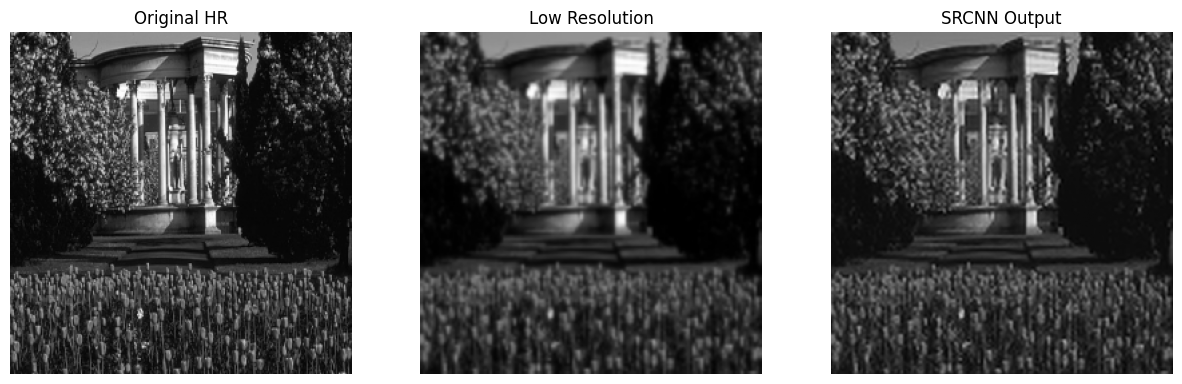

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob


# تعریف آماده‌سازی تصویر Low-Resolution
def prepare_lr(img, scale=2):
    img = color.rgb2ycbcr(img)[:, :, 0]
    img = transform.resize(img, (img.shape[0]//scale, img.shape[1]//scale), anti_aliasing=True)
    img = transform.resize(img, (img.shape[0]*scale, img.shape[1]*scale), anti_aliasing=True)
    return img

# بارگذاری همه تصاویر
def load_images(path):
    files = glob(os.path.join(path, '*.bmp')) + glob(os.path.join(path, '*.png')) + glob(os.path.join(path, '*.jpg'))
    images = []
    for file in files:
        img = io.imread(file)
        img = transform.resize(img, (256, 256), anti_aliasing=True)
        images.append(img)
    return images

dataset_path = '/content/drive/MyDrive/basicCNN/BSD200/'  # مسیر دیتاست
images = load_images(dataset_path)


# آماده‌سازی داده‌ها
x_train = []
y_train = []

for img in images:
    lr = prepare_lr(img)
    hr = color.rgb2ycbcr(img)[:, :, 0]
    x_train.append(lr)
    y_train.append(hr)

x_train = np.expand_dims(np.array(x_train), -1)
y_train = np.expand_dims(np.array(y_train), -1)


# ساخت مدل SRCNN
model = models.Sequential([
    layers.Input(shape=(None, None, 1)),
    layers.Conv2D(64, (9,9), activation='relu', padding='same'),
    layers.Conv2D(32, (5,5), activation='relu', padding='same'),
    layers.Conv2D(1, (5,5), activation='linear', padding='same')
])

model.compile(optimizer='adam', loss='mse')

# آموزش مدل
model.fit(x_train, y_train, batch_size=4, epochs=100, verbose=2)

# تست روی یک تصویر
idx = np.random.randint(0, len(images))
test_lr = np.expand_dims(prepare_lr(images[idx]), axis=(0, -1))
test_hr = color.rgb2ycbcr(images[idx])[:, :, 0]

predicted = model.predict(test_lr)[0, ..., 0]

# محاسبه ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Original HR')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()


cell code:2

Epoch 1/100
200/200 - 13s - 64ms/step - loss: 219.0846
Epoch 2/100
200/200 - 15s - 75ms/step - loss: 70.7929
Epoch 3/100
200/200 - 10s - 51ms/step - loss: 69.5487
Epoch 4/100
200/200 - 10s - 52ms/step - loss: 62.1274
Epoch 5/100
200/200 - 10s - 51ms/step - loss: 58.2915
Epoch 6/100
200/200 - 6s - 31ms/step - loss: 57.1842
Epoch 7/100
200/200 - 6s - 32ms/step - loss: 78.5819
Epoch 8/100
200/200 - 6s - 32ms/step - loss: 62.3114
Epoch 9/100
200/200 - 6s - 32ms/step - loss: 57.3274
Epoch 10/100
200/200 - 6s - 32ms/step - loss: 60.0075
Epoch 11/100
200/200 - 10s - 52ms/step - loss: 56.2201
Epoch 12/100
200/200 - 10s - 51ms/step - loss: 55.9592
Epoch 13/100
200/200 - 10s - 51ms/step - loss: 70.7855
Epoch 14/100
200/200 - 10s - 51ms/step - loss: 55.8751
Epoch 15/100
200/200 - 6s - 32ms/step - loss: 56.1355
Epoch 16/100
200/200 - 10s - 51ms/step - loss: 58.9353
Epoch 17/100
200/200 - 6s - 32ms/step - loss: 55.4477
Epoch 18/100
200/200 - 10s - 52ms/step - loss: 56.9490
Epoch 19/100
200/200 - 10

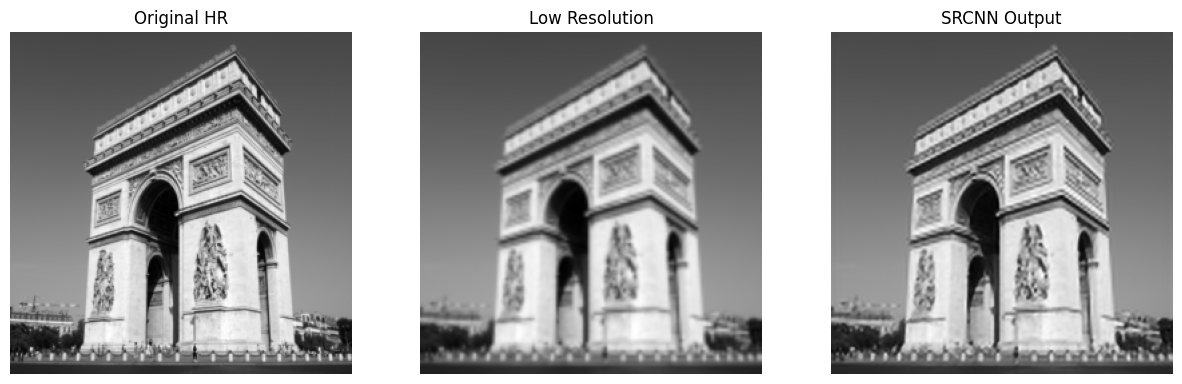

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob


# تعریف آماده‌سازی تصویر Low-Resolution
def prepare_lr(img, scale=2):
    img = color.rgb2ycbcr(img)[:, :, 0]
    img = transform.resize(img, (img.shape[0]//scale, img.shape[1]//scale), anti_aliasing=True)
    img = transform.resize(img, (img.shape[0]*scale, img.shape[1]*scale), anti_aliasing=True)
    return img

# بارگذاری همه تصاویر
def load_images(path):
    files = glob(os.path.join(path, '*.bmp')) + glob(os.path.join(path, '*.png')) + glob(os.path.join(path, '*.jpg'))
    images = []
    for file in files:
        img = io.imread(file)
        img = transform.resize(img, (256, 256), anti_aliasing=True)
        images.append(img)
    return images

dataset_path = '/content/drive/MyDrive/basicCNN/DIV2K_train_HR/'  # مسیر دیتاست
images = load_images(dataset_path)


# آماده‌سازی داده‌ها
x_train = []
y_train = []

for img in images:
    lr = prepare_lr(img)
    hr = color.rgb2ycbcr(img)[:, :, 0]
    x_train.append(lr)
    y_train.append(hr)

x_train = np.expand_dims(np.array(x_train), -1)
y_train = np.expand_dims(np.array(y_train), -1)


# ساخت مدل SRCNN
model = models.Sequential([
    layers.Input(shape=(None, None, 1)),
    layers.Conv2D(64, (9,9), activation='relu', padding='same'),
    layers.Conv2D(32, (5,5), activation='relu', padding='same'),
    layers.Conv2D(1, (5,5), activation='linear', padding='same')
])

model.compile(optimizer='adam', loss='mse')

# آموزش مدل
model.fit(x_train, y_train, batch_size=4, epochs=100, verbose=2)

# تست روی یک تصویر
idx = np.random.randint(0, len(images))
test_lr = np.expand_dims(prepare_lr(images[idx]), axis=(0, -1))
test_hr = color.rgb2ycbcr(images[idx])[:, :, 0]

predicted = model.predict(test_lr)[0, ..., 0]

# محاسبه ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Original HR')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()


cell code:3

Epoch 1/100
200/200 - 20s - 99ms/step - loss: 429.2091
Epoch 2/100
200/200 - 12s - 58ms/step - loss: 87.3101
Epoch 3/100
200/200 - 21s - 104ms/step - loss: 67.6373
Epoch 4/100
200/200 - 21s - 103ms/step - loss: 86.3301
Epoch 5/100
200/200 - 12s - 61ms/step - loss: 60.0071
Epoch 6/100
200/200 - 12s - 62ms/step - loss: 57.7159
Epoch 7/100
200/200 - 13s - 63ms/step - loss: 65.8561
Epoch 8/100
200/200 - 21s - 103ms/step - loss: 229.9906
Epoch 9/100
200/200 - 20s - 101ms/step - loss: 308.1900
Epoch 10/100
200/200 - 20s - 102ms/step - loss: 70.9688
Epoch 11/100
200/200 - 12s - 61ms/step - loss: 62.8369
Epoch 12/100
200/200 - 12s - 61ms/step - loss: 67.9836
Epoch 13/100
200/200 - 20s - 102ms/step - loss: 58.6771
Epoch 14/100
200/200 - 21s - 103ms/step - loss: 57.7445
Epoch 15/100
200/200 - 12s - 62ms/step - loss: 57.0632
Epoch 16/100
200/200 - 12s - 61ms/step - loss: 62.7913
Epoch 17/100
200/200 - 20s - 102ms/step - loss: 88.6004
Epoch 18/100
200/200 - 21s - 103ms/step - loss: 56.2254
Epoch 1

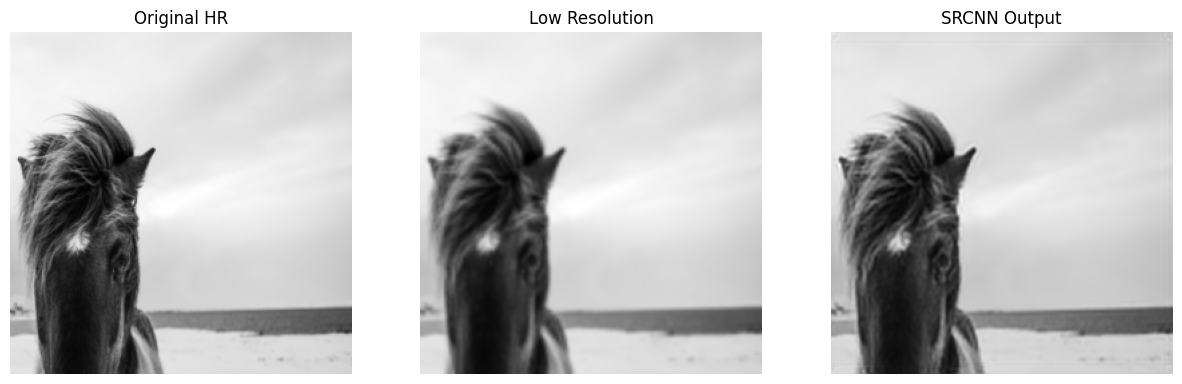

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob

# دانلود دیتاست 91-Image (
# فرض: شما دیتاست را آپلود کردی و در پوشه '91images' داری

# تعریف آماده‌سازی تصویر Low-Resolution
def prepare_lr(img, scale=2):
    img = color.rgb2ycbcr(img)[:, :, 0]
    img = transform.resize(img, (img.shape[0]//scale, img.shape[1]//scale), anti_aliasing=True)
    img = transform.resize(img, (img.shape[0]*scale, img.shape[1]*scale), anti_aliasing=True)
    return img

# بارگذاری همه تصاویر
def load_images(path):
    files = glob(os.path.join(path, '*.bmp')) + glob(os.path.join(path, '*.png')) + glob(os.path.join(path, '*.jpg'))
    images = []
    for file in files:
        img = io.imread(file)
        img = transform.resize(img, (256, 256), anti_aliasing=True)
        images.append(img)
    return images

dataset_path = '/content/drive/MyDrive/basicCNN/DIV2K_train_HR/'  # مسیر دیتاست
images = load_images(dataset_path)


# آماده‌سازی داده‌ها
x_train = []
y_train = []

for img in images:
    lr = prepare_lr(img)
    hr = color.rgb2ycbcr(img)[:, :, 0]
    x_train.append(lr)
    y_train.append(hr)

x_train = np.expand_dims(np.array(x_train), -1)
y_train = np.expand_dims(np.array(y_train), -1)


# ساخت مدل SRCNN
model = models.Sequential([
    layers.Input(shape=(None, None, 1)),

    layers.Conv2D(64, (9,9), activation='relu', padding='same'),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),

    layers.Conv2D(32, (5,5), activation='relu', padding='same'),

    layers.Conv2D(1, (5,5), activation='linear', padding='same')
])


model.compile(optimizer='adam', loss='mse')

# آموزش مدل
model.fit(x_train, y_train, batch_size=4, epochs=100, verbose=2)

# تست روی یک تصویر
idx = np.random.randint(0, len(images))
test_lr = np.expand_dims(prepare_lr(images[idx]), axis=(0, -1))
test_hr = color.rgb2ycbcr(images[idx])[:, :, 0]

predicted = model.predict(test_lr)[0, ..., 0]

# محاسبه ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Original HR')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()


cell code:4

Epoch 1/100
23/23 - 9s - 398ms/step - loss: 2929.9255
Epoch 2/100
23/23 - 1s - 30ms/step - loss: 498.8271
Epoch 3/100
23/23 - 1s - 55ms/step - loss: 407.7973
Epoch 4/100
23/23 - 1s - 55ms/step - loss: 372.1281
Epoch 5/100
23/23 - 1s - 30ms/step - loss: 339.5168
Epoch 6/100
23/23 - 1s - 55ms/step - loss: 305.9845
Epoch 7/100
23/23 - 1s - 55ms/step - loss: 271.9464
Epoch 8/100
23/23 - 1s - 56ms/step - loss: 239.7935
Epoch 9/100
23/23 - 1s - 32ms/step - loss: 211.6704
Epoch 10/100
23/23 - 1s - 54ms/step - loss: 188.9637
Epoch 11/100
23/23 - 1s - 30ms/step - loss: 172.0446
Epoch 12/100
23/23 - 1s - 55ms/step - loss: 160.8705
Epoch 13/100
23/23 - 1s - 55ms/step - loss: 153.4167
Epoch 14/100
23/23 - 1s - 55ms/step - loss: 144.0626
Epoch 15/100
23/23 - 1s - 55ms/step - loss: 135.8796
Epoch 16/100
23/23 - 1s - 55ms/step - loss: 133.4484
Epoch 17/100
23/23 - 1s - 55ms/step - loss: 129.5735
Epoch 18/100
23/23 - 1s - 55ms/step - loss: 118.1925
Epoch 19/100
23/23 - 1s - 31ms/step - loss: 110.3775


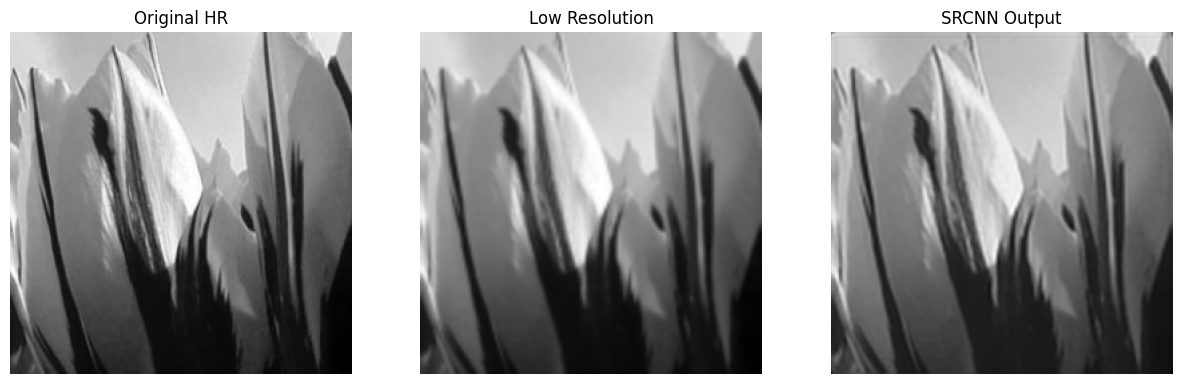

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob

# دانلود دیتاست 91-Image (
# فرض: شما دیتاست را آپلود کردی و در پوشه '91images' داری

# تعریف آماده‌سازی تصویر Low-Resolution
def prepare_lr(img, scale=2):
    img = color.rgb2ycbcr(img)[:, :, 0]
    img = transform.resize(img, (img.shape[0]//scale, img.shape[1]//scale), anti_aliasing=True)
    img = transform.resize(img, (img.shape[0]*scale, img.shape[1]*scale), anti_aliasing=True)
    return img

# بارگذاری همه تصاویر
def load_images(path):
    files = glob(os.path.join(path, '*.bmp')) + glob(os.path.join(path, '*.png')) + glob(os.path.join(path, '*.jpg'))
    images = []
    for file in files:
        img = io.imread(file)
        img = transform.resize(img, (256, 256), anti_aliasing=True)
        images.append(img)
    return images

dataset_path = '/content/drive/MyDrive/basicCNN/91images/'  # مسیر دیتاست
images = load_images(dataset_path)


# آماده‌سازی داده‌ها
x_train = []
y_train = []

for img in images:
    lr = prepare_lr(img)
    hr = color.rgb2ycbcr(img)[:, :, 0]
    x_train.append(lr)
    y_train.append(hr)

x_train = np.expand_dims(np.array(x_train), -1)
y_train = np.expand_dims(np.array(y_train), -1)


# ساخت مدل SRCNN
model = models.Sequential([
    layers.Input(shape=(None, None, 1)),
    layers.Conv2D(64, (9,9), activation='relu', padding='same'),
    layers.Conv2D(32, (5,5), activation='relu', padding='same'),
    layers.Conv2D(1, (5,5), activation='linear', padding='same')
])

model.compile(optimizer='adam', loss='mse')

# آموزش مدل
model.fit(x_train, y_train, batch_size=4, epochs=100, verbose=2)

# تست روی یک تصویر
idx = np.random.randint(0, len(images))
test_lr = np.expand_dims(prepare_lr(images[idx]), axis=(0, -1))
test_hr = color.rgb2ycbcr(images[idx])[:, :, 0]

predicted = model.predict(test_lr)[0, ..., 0]

# محاسبه ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Original HR')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()


cell code:5

Epoch 1/100
23/23 - 13s - 571ms/step - loss: 1645.5056
Epoch 2/100
23/23 - 1s - 55ms/step - loss: 269.5054
Epoch 3/100
23/23 - 3s - 112ms/step - loss: 124.0334
Epoch 4/100
23/23 - 3s - 111ms/step - loss: 82.5931
Epoch 5/100
23/23 - 3s - 109ms/step - loss: 64.3741
Epoch 6/100
23/23 - 1s - 56ms/step - loss: 74.1491
Epoch 7/100
23/23 - 3s - 111ms/step - loss: 58.8943
Epoch 8/100
23/23 - 1s - 56ms/step - loss: 54.7610
Epoch 9/100
23/23 - 3s - 110ms/step - loss: 45.6401
Epoch 10/100
23/23 - 3s - 112ms/step - loss: 44.8514
Epoch 11/100
23/23 - 3s - 109ms/step - loss: 62.6828
Epoch 12/100
23/23 - 1s - 57ms/step - loss: 55.2923
Epoch 13/100
23/23 - 3s - 111ms/step - loss: 39.3746
Epoch 14/100
23/23 - 3s - 111ms/step - loss: 35.7791
Epoch 15/100
23/23 - 3s - 111ms/step - loss: 33.9019
Epoch 16/100
23/23 - 3s - 110ms/step - loss: 32.7005
Epoch 17/100
23/23 - 1s - 57ms/step - loss: 34.7629
Epoch 18/100
23/23 - 3s - 110ms/step - loss: 41.0266
Epoch 19/100
23/23 - 1s - 58ms/step - loss: 33.2167
Epo

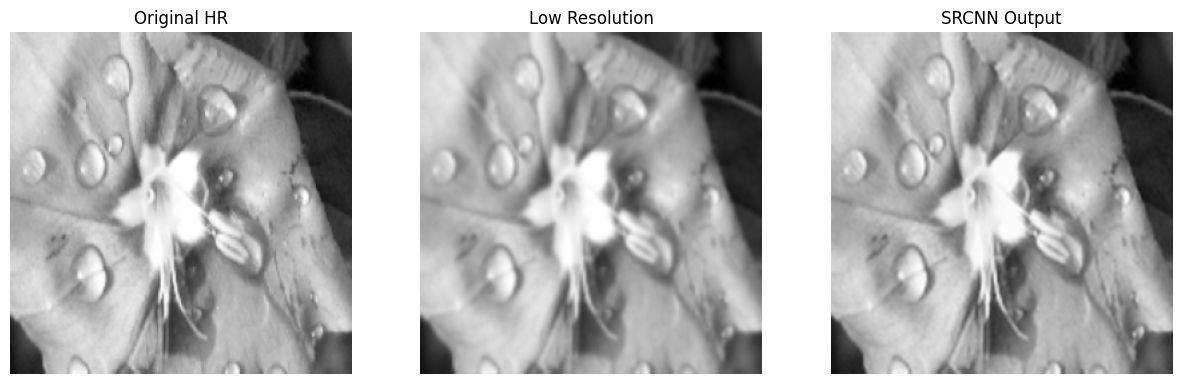

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob

# دانلود دیتاست 91-Image (
# فرض: شما دیتاست را آپلود کردی و در پوشه '91images' داری

# تعریف آماده‌سازی تصویر Low-Resolution
def prepare_lr(img, scale=2):
    img = color.rgb2ycbcr(img)[:, :, 0]
    img = transform.resize(img, (img.shape[0]//scale, img.shape[1]//scale), anti_aliasing=True)
    img = transform.resize(img, (img.shape[0]*scale, img.shape[1]*scale), anti_aliasing=True)
    return img

# بارگذاری همه تصاویر
def load_images(path):
    files = glob(os.path.join(path, '*.bmp')) + glob(os.path.join(path, '*.png')) + glob(os.path.join(path, '*.jpg'))
    images = []
    for file in files:
        img = io.imread(file)
        img = transform.resize(img, (256, 256), anti_aliasing=True)
        images.append(img)
    return images

dataset_path = '/content/drive/MyDrive/basicCNN/91images/'  # مسیر دیتاست
images = load_images(dataset_path)


# آماده‌سازی داده‌ها
x_train = []
y_train = []

for img in images:
    lr = prepare_lr(img)
    hr = color.rgb2ycbcr(img)[:, :, 0]
    x_train.append(lr)
    y_train.append(hr)

x_train = np.expand_dims(np.array(x_train), -1)
y_train = np.expand_dims(np.array(y_train), -1)


# ساخت مدل SRCNN
model = models.Sequential([
    layers.Input(shape=(None, None, 1)),

    layers.Conv2D(64, (9,9), activation='relu', padding='same'),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),

    layers.Conv2D(32, (5,5), activation='relu', padding='same'),

    layers.Conv2D(1, (5,5), activation='linear', padding='same')
])


model.compile(optimizer='adam', loss='mse')

# آموزش مدل
model.fit(x_train, y_train, batch_size=4, epochs=100, verbose=2)

# تست روی یک تصویر
idx = np.random.randint(0, len(images))
test_lr = np.expand_dims(prepare_lr(images[idx]), axis=(0, -1))
test_hr = color.rgb2ycbcr(images[idx])[:, :, 0]

predicted = model.predict(test_lr)[0, ..., 0]

# محاسبه ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Original HR')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()


cell code:6

Epoch 1/300
23/23 - 4s - 182ms/step - loss: 3349.3994
Epoch 2/300
23/23 - 1s - 62ms/step - loss: 390.9119
Epoch 3/300
23/23 - 1s - 63ms/step - loss: 190.9671
Epoch 4/300
23/23 - 1s - 63ms/step - loss: 103.8920
Epoch 5/300
23/23 - 1s - 62ms/step - loss: 73.5751
Epoch 6/300
23/23 - 3s - 110ms/step - loss: 59.1099
Epoch 7/300
23/23 - 3s - 111ms/step - loss: 56.5792
Epoch 8/300
23/23 - 3s - 111ms/step - loss: 47.5273
Epoch 9/300
23/23 - 1s - 64ms/step - loss: 116.9251
Epoch 10/300
23/23 - 3s - 110ms/step - loss: 85.6131
Epoch 11/300
23/23 - 3s - 110ms/step - loss: 55.3680
Epoch 12/300
23/23 - 1s - 64ms/step - loss: 42.6312
Epoch 13/300
23/23 - 3s - 111ms/step - loss: 40.6753
Epoch 14/300
23/23 - 1s - 64ms/step - loss: 39.4981
Epoch 15/300
23/23 - 3s - 111ms/step - loss: 38.5626
Epoch 16/300
23/23 - 3s - 110ms/step - loss: 37.7371
Epoch 17/300
23/23 - 3s - 110ms/step - loss: 36.9918
Epoch 18/300
23/23 - 3s - 110ms/step - loss: 36.2427
Epoch 19/300
23/23 - 1s - 63ms/step - loss: 35.6077
Epoc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
PSNR: -7.926978321375485
SSIM: 0.9065043347726077


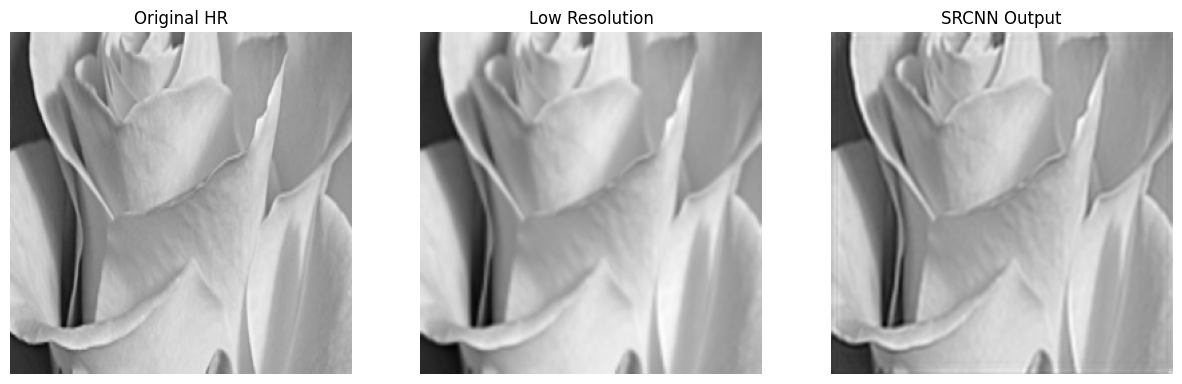

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob

# دانلود دیتاست 91-Image (
# فرض: شما دیتاست را آپلود کردی و در پوشه '91images' داری

# تعریف آماده‌سازی تصویر Low-Resolution
def prepare_lr(img, scale=2):
    img = color.rgb2ycbcr(img)[:, :, 0]
    img = transform.resize(img, (img.shape[0]//scale, img.shape[1]//scale), anti_aliasing=True)
    img = transform.resize(img, (img.shape[0]*scale, img.shape[1]*scale), anti_aliasing=True)
    return img

# بارگذاری همه تصاویر
def load_images(path):
    files = glob(os.path.join(path, '*.bmp')) + glob(os.path.join(path, '*.png')) + glob(os.path.join(path, '*.jpg'))
    images = []
    for file in files:
        img = io.imread(file)
        img = transform.resize(img, (256, 256), anti_aliasing=True)
        images.append(img)
    return images

dataset_path = '/content/drive/MyDrive/basicCNN/91images/'  # مسیر دیتاست
images = load_images(dataset_path)


# آماده‌سازی داده‌ها
x_train = []
y_train = []

for img in images:
    lr = prepare_lr(img)
    hr = color.rgb2ycbcr(img)[:, :, 0]
    x_train.append(lr)
    y_train.append(hr)

x_train = np.expand_dims(np.array(x_train), -1)
y_train = np.expand_dims(np.array(y_train), -1)


# ساخت مدل SRCNN
model = models.Sequential([
    layers.Input(shape=(None, None, 1)),

    layers.Conv2D(64, (9,9), activation='relu', padding='same'),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),

    layers.Conv2D(32, (5,5), activation='relu', padding='same'),

    layers.Conv2D(1, (5,5), activation='linear', padding='same')
])


model.compile(optimizer='adam', loss='mse')

# آموزش مدل
model.fit(x_train, y_train, batch_size=4, epochs=300, verbose=2)

# تست روی یک تصویر
idx = np.random.randint(0, len(images))
test_lr = np.expand_dims(prepare_lr(images[idx]), axis=(0, -1))
test_hr = color.rgb2ycbcr(images[idx])[:, :, 0]

predicted = model.predict(test_lr)[0, ..., 0]

# محاسبه ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Original HR')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()


cell code:7

Epoch 1/400
23/23 - 7s - 311ms/step - loss: 5902.5049
Epoch 2/400
23/23 - 4s - 161ms/step - loss: 376.9120
Epoch 3/400
23/23 - 1s - 62ms/step - loss: 168.5655
Epoch 4/400
23/23 - 1s - 62ms/step - loss: 88.4043
Epoch 5/400
23/23 - 3s - 112ms/step - loss: 68.7333
Epoch 6/400
23/23 - 1s - 62ms/step - loss: 61.3245
Epoch 7/400
23/23 - 3s - 111ms/step - loss: 48.9159
Epoch 8/400
23/23 - 3s - 110ms/step - loss: 43.3307
Epoch 9/400
23/23 - 1s - 63ms/step - loss: 39.2955
Epoch 10/400
23/23 - 3s - 112ms/step - loss: 35.8839
Epoch 11/400
23/23 - 1s - 65ms/step - loss: 35.1173
Epoch 12/400
23/23 - 1s - 64ms/step - loss: 35.5591
Epoch 13/400
23/23 - 3s - 110ms/step - loss: 32.7368
Epoch 14/400
23/23 - 3s - 111ms/step - loss: 30.4331
Epoch 15/400
23/23 - 3s - 110ms/step - loss: 29.4411
Epoch 16/400
23/23 - 3s - 112ms/step - loss: 28.9047
Epoch 17/400
23/23 - 2s - 65ms/step - loss: 28.5406
Epoch 18/400
23/23 - 3s - 110ms/step - loss: 27.5849
Epoch 19/400
23/23 - 1s - 64ms/step - loss: 28.5378
Epoch 

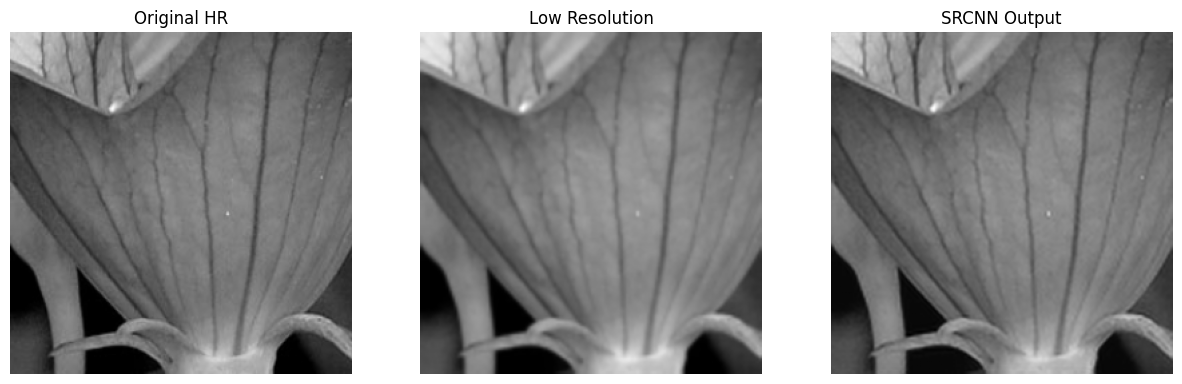

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob

# دانلود دیتاست 91-Image (
# فرض: شما دیتاست را آپلود کردی و در پوشه '91images' داری

# تعریف آماده‌سازی تصویر Low-Resolution
def prepare_lr(img, scale=2):
    img = color.rgb2ycbcr(img)[:, :, 0]
    img = transform.resize(img, (img.shape[0]//scale, img.shape[1]//scale), anti_aliasing=True)
    img = transform.resize(img, (img.shape[0]*scale, img.shape[1]*scale), anti_aliasing=True)
    return img

# بارگذاری همه تصاویر
def load_images(path):
    files = glob(os.path.join(path, '*.bmp')) + glob(os.path.join(path, '*.png')) + glob(os.path.join(path, '*.jpg'))
    images = []
    for file in files:
        img = io.imread(file)
        img = transform.resize(img, (256, 256), anti_aliasing=True)
        images.append(img)
    return images

dataset_path = '/content/drive/MyDrive/basicCNN/91images/'  # مسیر دیتاست
images = load_images(dataset_path)


# آماده‌سازی داده‌ها
x_train = []
y_train = []

for img in images:
    lr = prepare_lr(img)
    hr = color.rgb2ycbcr(img)[:, :, 0]
    x_train.append(lr)
    y_train.append(hr)

x_train = np.expand_dims(np.array(x_train), -1)
y_train = np.expand_dims(np.array(y_train), -1)


# ساخت مدل SRCNN
model = models.Sequential([
    layers.Input(shape=(None, None, 1)),

    layers.Conv2D(64, (9,9), activation='relu', padding='same'),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),

    layers.Conv2D(32, (5,5), activation='relu', padding='same'),

    layers.Conv2D(1, (5,5), activation='linear', padding='same')
])


model.compile(optimizer='adam', loss='mse')

# آموزش مدل
model.fit(x_train, y_train, batch_size=4, epochs=400, verbose=2)

# تست روی یک تصویر
idx = np.random.randint(0, len(images))
test_lr = np.expand_dims(prepare_lr(images[idx]), axis=(0, -1))
test_hr = color.rgb2ycbcr(images[idx])[:, :, 0]

predicted = model.predict(test_lr)[0, ..., 0]

# محاسبه ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Original HR')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()


cell code:8

Epoch 1/500
23/23 - 4s - 183ms/step - loss: 1760.5829
Epoch 2/500
23/23 - 1s - 64ms/step - loss: 317.4329
Epoch 3/500
23/23 - 1s - 64ms/step - loss: 135.2097
Epoch 4/500
23/23 - 1s - 64ms/step - loss: 83.5535
Epoch 5/500
23/23 - 3s - 110ms/step - loss: 62.5283
Epoch 6/500
23/23 - 1s - 64ms/step - loss: 60.5582
Epoch 7/500
23/23 - 3s - 111ms/step - loss: 46.1868
Epoch 8/500
23/23 - 3s - 111ms/step - loss: 42.3887
Epoch 9/500
23/23 - 3s - 110ms/step - loss: 40.5698
Epoch 10/500
23/23 - 1s - 64ms/step - loss: 43.8106
Epoch 11/500
23/23 - 1s - 64ms/step - loss: 37.5091
Epoch 12/500
23/23 - 3s - 110ms/step - loss: 53.6781
Epoch 13/500
23/23 - 3s - 110ms/step - loss: 39.5216
Epoch 14/500
23/23 - 1s - 63ms/step - loss: 51.1392
Epoch 15/500
23/23 - 1s - 64ms/step - loss: 40.8776
Epoch 16/500
23/23 - 1s - 64ms/step - loss: 35.6347
Epoch 17/500
23/23 - 3s - 110ms/step - loss: 31.8227
Epoch 18/500
23/23 - 1s - 63ms/step - loss: 31.1557
Epoch 19/500
23/23 - 3s - 110ms/step - loss: 30.6548
Epoch 20

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
PSNR: -8.644735289224725
SSIM: 0.9705074614890173


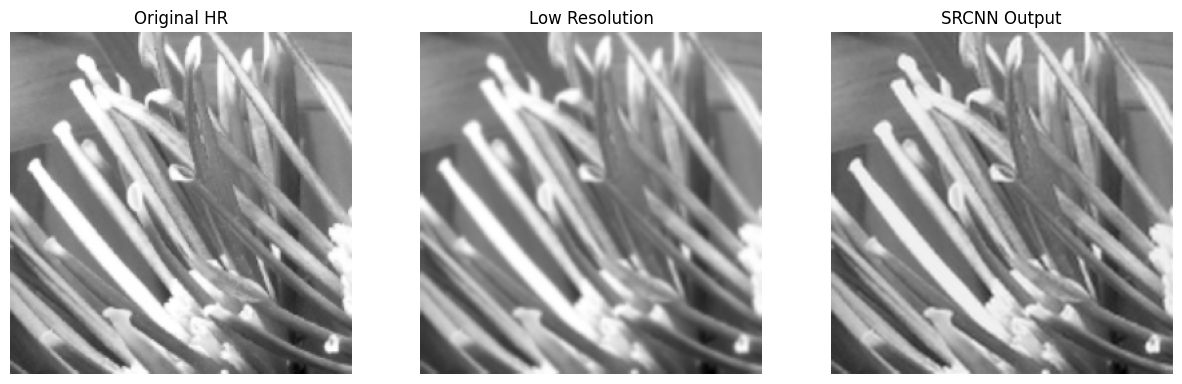

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob

# دانلود دیتاست 91-Image (
# فرض: شما دیتاست را آپلود کردی و در پوشه '91images' داری

# تعریف آماده‌سازی تصویر Low-Resolution
def prepare_lr(img, scale=2):
    img = color.rgb2ycbcr(img)[:, :, 0]
    img = transform.resize(img, (img.shape[0]//scale, img.shape[1]//scale), anti_aliasing=True)
    img = transform.resize(img, (img.shape[0]*scale, img.shape[1]*scale), anti_aliasing=True)
    return img

# بارگذاری همه تصاویر
def load_images(path):
    files = glob(os.path.join(path, '*.bmp')) + glob(os.path.join(path, '*.png')) + glob(os.path.join(path, '*.jpg'))
    images = []
    for file in files:
        img = io.imread(file)
        img = transform.resize(img, (256, 256), anti_aliasing=True)
        images.append(img)
    return images

dataset_path = '/content/drive/MyDrive/basicCNN/91images/'  # مسیر دیتاست
images = load_images(dataset_path)


# آماده‌سازی داده‌ها
x_train = []
y_train = []

for img in images:
    lr = prepare_lr(img)
    hr = color.rgb2ycbcr(img)[:, :, 0]
    x_train.append(lr)
    y_train.append(hr)

x_train = np.expand_dims(np.array(x_train), -1)
y_train = np.expand_dims(np.array(y_train), -1)


# ساخت مدل SRCNN
model = models.Sequential([
    layers.Input(shape=(None, None, 1)),

    layers.Conv2D(64, (9,9), activation='relu', padding='same'),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),

    layers.Conv2D(32, (5,5), activation='relu', padding='same'),

    layers.Conv2D(1, (5,5), activation='linear', padding='same')
])


model.compile(optimizer='adam', loss='mse')

# آموزش مدل
model.fit(x_train, y_train, batch_size=4, epochs=500, verbose=2)

# تست روی یک تصویر
idx = np.random.randint(0, len(images))
test_lr = np.expand_dims(prepare_lr(images[idx]), axis=(0, -1))
test_hr = color.rgb2ycbcr(images[idx])[:, :, 0]

predicted = model.predict(test_lr)[0, ..., 0]

# محاسبه ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Original HR')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()


cell code:9

Epoch 1/600
23/23 - 4s - 180ms/step - loss: 1801.2585
Epoch 2/600
23/23 - 4s - 162ms/step - loss: 286.7614
Epoch 3/600
23/23 - 1s - 62ms/step - loss: 265.8398
Epoch 4/600
23/23 - 3s - 111ms/step - loss: 122.2500
Epoch 5/600
23/23 - 1s - 62ms/step - loss: 83.9273
Epoch 6/600
23/23 - 3s - 111ms/step - loss: 66.6911
Epoch 7/600
23/23 - 3s - 110ms/step - loss: 59.8567
Epoch 8/600
23/23 - 3s - 110ms/step - loss: 51.4959
Epoch 9/600
23/23 - 3s - 112ms/step - loss: 46.9604
Epoch 10/600
23/23 - 3s - 109ms/step - loss: 65.6925
Epoch 11/600
23/23 - 1s - 63ms/step - loss: 77.8679
Epoch 12/600
23/23 - 3s - 111ms/step - loss: 42.5569
Epoch 13/600
23/23 - 1s - 63ms/step - loss: 37.7674
Epoch 14/600
23/23 - 1s - 64ms/step - loss: 35.5036
Epoch 15/600
23/23 - 1s - 64ms/step - loss: 36.0738
Epoch 16/600
23/23 - 3s - 110ms/step - loss: 31.7405
Epoch 17/600
23/23 - 1s - 64ms/step - loss: 33.9762
Epoch 18/600
23/23 - 3s - 110ms/step - loss: 65.5702
Epoch 19/600
23/23 - 3s - 111ms/step - loss: 37.9563
Epoc

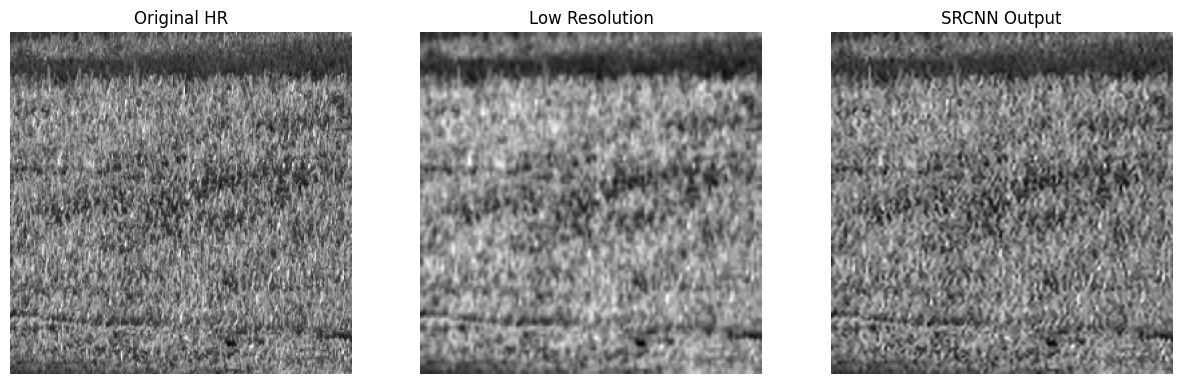

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob

# دانلود دیتاست 91-Image (
# فرض: شما دیتاست را آپلود کردی و در پوشه '91images' داری

# تعریف آماده‌سازی تصویر Low-Resolution
def prepare_lr(img, scale=2):
    img = color.rgb2ycbcr(img)[:, :, 0]
    img = transform.resize(img, (img.shape[0]//scale, img.shape[1]//scale), anti_aliasing=True)
    img = transform.resize(img, (img.shape[0]*scale, img.shape[1]*scale), anti_aliasing=True)
    return img

# بارگذاری همه تصاویر
def load_images(path):
    files = glob(os.path.join(path, '*.bmp')) + glob(os.path.join(path, '*.png')) + glob(os.path.join(path, '*.jpg'))
    images = []
    for file in files:
        img = io.imread(file)
        img = transform.resize(img, (256, 256), anti_aliasing=True)
        images.append(img)
    return images

dataset_path = '/content/drive/MyDrive/basicCNN/91images/'  # مسیر دیتاست
images = load_images(dataset_path)


# آماده‌سازی داده‌ها
x_train = []
y_train = []

for img in images:
    lr = prepare_lr(img)
    hr = color.rgb2ycbcr(img)[:, :, 0]
    x_train.append(lr)
    y_train.append(hr)

x_train = np.expand_dims(np.array(x_train), -1)
y_train = np.expand_dims(np.array(y_train), -1)


# ساخت مدل SRCNN
model = models.Sequential([
    layers.Input(shape=(None, None, 1)),

    layers.Conv2D(64, (9,9), activation='relu', padding='same'),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),

    layers.Conv2D(32, (5,5), activation='relu', padding='same'),

    layers.Conv2D(1, (5,5), activation='linear', padding='same')
])


model.compile(optimizer='adam', loss='mse')

# آموزش مدل
model.fit(x_train, y_train, batch_size=4, epochs=600, verbose=2)

# تست روی یک تصویر
idx = np.random.randint(0, len(images))
test_lr = np.expand_dims(prepare_lr(images[idx]), axis=(0, -1))
test_hr = color.rgb2ycbcr(images[idx])[:, :, 0]

predicted = model.predict(test_lr)[0, ..., 0]

# محاسبه ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Original HR')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()


cell code:10

Epoch 1/1000
23/23 - 5s - 214ms/step - loss: 1930.9528
Epoch 2/1000
23/23 - 3s - 131ms/step - loss: 310.4709
Epoch 3/1000
23/23 - 2s - 108ms/step - loss: 152.7901
Epoch 4/1000
23/23 - 2s - 106ms/step - loss: 79.4752
Epoch 5/1000
23/23 - 3s - 111ms/step - loss: 62.2015
Epoch 6/1000
23/23 - 1s - 63ms/step - loss: 51.4700
Epoch 7/1000
23/23 - 3s - 111ms/step - loss: 42.8130
Epoch 8/1000
23/23 - 2s - 66ms/step - loss: 45.9817
Epoch 9/1000
23/23 - 1s - 64ms/step - loss: 37.2474
Epoch 10/1000
23/23 - 3s - 110ms/step - loss: 34.0981
Epoch 11/1000
23/23 - 3s - 111ms/step - loss: 32.7645
Epoch 12/1000
23/23 - 3s - 110ms/step - loss: 31.6147
Epoch 13/1000
23/23 - 3s - 111ms/step - loss: 31.7500
Epoch 14/1000
23/23 - 1s - 64ms/step - loss: 79.5073
Epoch 15/1000
23/23 - 3s - 110ms/step - loss: 73.7852
Epoch 16/1000
23/23 - 3s - 110ms/step - loss: 51.6925
Epoch 17/1000
23/23 - 1s - 63ms/step - loss: 36.9203
Epoch 18/1000
23/23 - 3s - 110ms/step - loss: 28.7417
Epoch 19/1000
23/23 - 3s - 110ms/step 

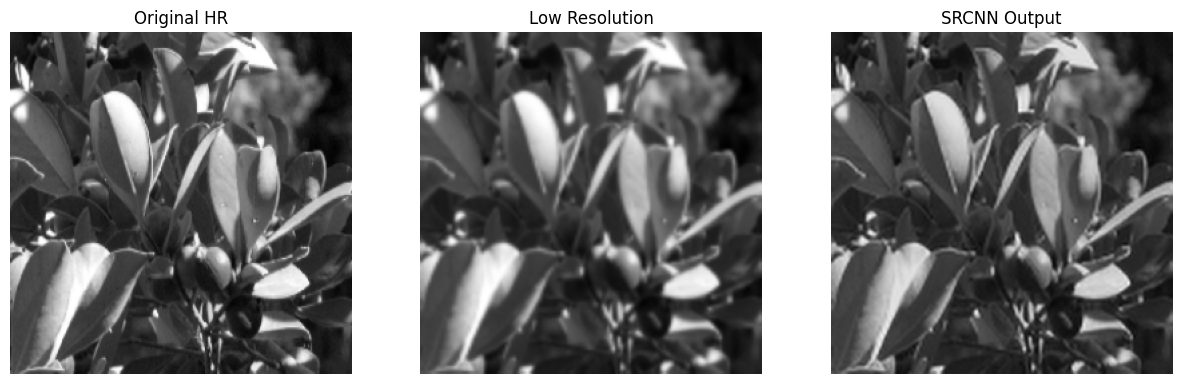

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob

# دانلود دیتاست 91-Image (
# فرض: شما دیتاست را آپلود کردی و در پوشه '91images' داری

# تعریف آماده‌سازی تصویر Low-Resolution
def prepare_lr(img, scale=2):
    img = color.rgb2ycbcr(img)[:, :, 0]
    img = transform.resize(img, (img.shape[0]//scale, img.shape[1]//scale), anti_aliasing=True)
    img = transform.resize(img, (img.shape[0]*scale, img.shape[1]*scale), anti_aliasing=True)
    return img

# بارگذاری همه تصاویر
def load_images(path):
    files = glob(os.path.join(path, '*.bmp')) + glob(os.path.join(path, '*.png')) + glob(os.path.join(path, '*.jpg'))
    images = []
    for file in files:
        img = io.imread(file)
        img = transform.resize(img, (256, 256), anti_aliasing=True)
        images.append(img)
    return images

dataset_path = '/content/drive/MyDrive/basicCNN/91images/'  # مسیر دیتاست
images = load_images(dataset_path)


# آماده‌سازی داده‌ها
x_train = []
y_train = []

for img in images:
    lr = prepare_lr(img)
    hr = color.rgb2ycbcr(img)[:, :, 0]
    x_train.append(lr)
    y_train.append(hr)

x_train = np.expand_dims(np.array(x_train), -1)
y_train = np.expand_dims(np.array(y_train), -1)


# ساخت مدل SRCNN
model = models.Sequential([
    layers.Input(shape=(None, None, 1)),

    layers.Conv2D(64, (9,9), activation='relu', padding='same'),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),

    layers.Conv2D(32, (5,5), activation='relu', padding='same'),

    layers.Conv2D(1, (5,5), activation='linear', padding='same')
])


model.compile(optimizer='adam', loss='mse')

# آموزش مدل
model.fit(x_train, y_train, batch_size=4, epochs=1000, verbose=2)

# تست روی یک تصویر
idx = np.random.randint(0, len(images))
test_lr = np.expand_dims(prepare_lr(images[idx]), axis=(0, -1))
test_hr = color.rgb2ycbcr(images[idx])[:, :, 0]

predicted = model.predict(test_lr)[0, ..., 0]

# محاسبه ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Original HR')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()
